# CNMF-E demo pipeline
##### version 2025, modified by Eunju Sung

This notebook demonstrates how to use Caiman for processing 1p microendoscopic data. It shows how to use Caiman for the following steps:

1. Apply the nonrigid motion correction (NoRMCorre) algorithm for motion correction to the original movie.
2. Apply the constrained nonnegative matrix factorization endoscopic (CNMF-E) source separation algorithm to extract an initial estimate of neuronal spatial footprint and calcium traces.
3. Apply quality control metrics to evaluate the initial estimates to narrow them down to a final set of estimates.

\+ plot and save extracted dF/F trace and clustered heatmap

reference: https://github.com/flatironinstitute/CaImAn/blob/main/demos/notebooks/demo_pipeline_cnmfE.ipynb

or see CaImAn docs for more information: https://caiman.readthedocs.io/en/latest/index.html

# Imports and general setup

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
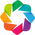

In [1]:
import bokeh.plotting as bpl
import cv2
import glob
import holoviews as hv
from IPython import get_ipython
import logging
import matplotlib.pyplot as plt
import numpy as np
import os
import psutil

import caiman as cm
from caiman.source_extraction import cnmf
from caiman.source_extraction.cnmf.cnmf import load_CNMF
from caiman.utils.utils import download_demo
from caiman.utils.visualization import inspect_correlation_pnr, nb_inspect_correlation_pnr
from caiman.motion_correction import MotionCorrect
from caiman.source_extraction.cnmf import params as params
from caiman.utils.visualization import plot_contours, nb_view_patches, nb_plot_contour
from caiman.utils.visualization import view_quilt

try:
    if __IPYTHON__:
        get_ipython().run_line_magic('load_ext', 'autoreload')
        get_ipython().run_line_magic('autoreload', '2')
        # get_ipython().run_line_magic('matplotlib', 'qt')  #uncomment to run in qt mode
except NameError:
    pass

try:
    cv2.setNumThreads(0)
except:
    pass

bpl.output_notebook()
hv.notebook_extension('bokeh')

Set up logger and environment variables

In [2]:
# set up logging
logfile = None # Replace with a path if you want to log to a file
logger = logging.getLogger('caiman')
# Set to logging.INFO if you want much output, potentially much more output
logger.setLevel(logging.WARNING)
logfmt = logging.Formatter('%(relativeCreated)12d [%(filename)s:%(funcName)20s():%(lineno)s] [%(process)d] %(message)s')
if logfile is not None:
    handler = logging.FileHandler(logfile)
else:
    handler = logging.StreamHandler()
handler.setFormatter(logfmt)
logger.addHandler(handler)

# set env variables in case they weren't already set
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"

# Set file path and shading function

In [3]:
import gdown
import os

# Extracted file ID from your link
file_id = "1Cz4tGmvZBYIbK1jKYtIVoCLrwBo-02kL"
url = f"https://drive.google.com/uc?id={file_id}"

# Set desired filename
movie_filename = "Ganglion.tif"

# Download file
gdown.download(url, movie_filename, quiet=False)

# Step 3: Set file path and output folder
movie_path = [movie_filename]
output_path = "result"
os.makedirs(output_path, exist_ok=True)


Downloading...
From: https://drive.google.com/uc?id=1Cz4tGmvZBYIbK1jKYtIVoCLrwBo-02kL
To: /home/jovyan/Ganglion.tif
100%|██████████| 66.6M/66.6M [00:02<00:00, 22.7MB/s]


In [4]:
print(f"You have {psutil.cpu_count()} CPUs available in your current environment")
num_processors_to_use = None

You have 48 CPUs available in your current environment


If you have already set up multiprocessing (the `cluster` variable is already in your namespace), then that cluster will be closed and a new one created.

In [5]:
#%% start a cluster for parallel processing (if a cluster already exists it will be closed and a new session will be opened)
if 'cluster' in locals():  # 'locals' contains list of current local variables
    print('Closing previous cluster')
    cm.stop_server(dview=cluster)
print("Setting up new cluster")
_, cluster, n_processes = cm.cluster.setup_cluster(backend='multiprocessing', 
                                                 n_processes=num_processors_to_use, 
                                                 ignore_preexisting=False)
print(f"Successfully set up cluster with {n_processes} processes")

Setting up new cluster
Successfully set up cluster with 47 processes


# Define parameters
We first set some parameters related to the data and motion correction and create a `params` object. We'll modify this parameter object later on with settings for source extraction. You can also set all the parameters at once as demonstrated in the `demo_pipeline.ipynb` notebook.

Note here we are setting `pw_rigid` to `False`, as our data seems to mainly contain large-scale translational motion. We can always redo this later if it turns out to be a mistake.

# Key parameters for CNMF...
#### 1. rf (int): patch half-width

rf ('receptive field') is the half width of patches that in pixels (the actual patch width is 2*rf + 1). See previous image for a representation of how the field of view is split up into patches for parallel procesing. rf should be at least 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If rf is set to None, then CNMF will be run on the entire field of view.

#### 2. stride (int): patch overlap

stride is the overlap between patches in pixels (the actual overlap is stride + 1). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches.

#### 3. K (int): components per patch

K is the expected number of components per patch. You should adapt this to the density of components in your data, and the current rf parameter. We suggest you pick K based on the more dense patches in your movie so you don't miss neurons (we want to avoid false negatives).

#### 4. gSig (int, int): half-width of neurons

gSig is roughly the half-width of neurons in your movie in pixels (height, width): it is the sigma parameter of a Gaussian filter run on all the images during initialization. If the filter matches the neurons, you will get a much better estimate. gSig goes with gSiz, which is the kernel size (height and width in pixels) used for the filter. See the GaussianBlur() OpenCV function for more details on the sigma and size parameters.

merge_thr (float): merge threshold

If two spatially overlapping components are correlated above merge_thr, they will be merged into one component. The correlation coefficient is calculated using their calcium traces. If Caiman identifies a "component" that clearly contains two overlapping components, then increase merge_thr.

You typically will set rf and stride infrequently, so K, gSig, and merge_thr are the main parameters you will tweak when analyzing a given session. Note these are not the only important parameters. They just tend to be the most important: the others tend to depend on your calcium indicator or other factors that don't vary within an experimental session.


### all parameters
- `fnames`: List of paths to the file(s) to be analysed. Memmap and hdf5 result files will be saved in the same directory.
- `fr`: Imaging frame rate in frames per second.
- `decay_time`: Length of a typical transient in seconds. decay_time is an approximation of the time scale over which to expect a significant shift in the calcium signal during a transient. It defaults to 0.4, which is appropriate for fast indicators (GCaMP6f), slow indicators might use 1 or even more. However, decay_time does not have to precisely fit the data, approximations are enough.
- `p`: Order of the autoregressive model. p = 0 turns deconvolution off. If transients in your data rise instantaneously, set p = 1 (occurs at low sample rate or slow indicator). If transients have visible rise time, set p = 2. If the wrong order is chosen, spikes are extracted unreliably.
- `nb`: Number of global background components. This is a measure of the complexity of your background noise. Defaults to nb = 2, assuming a relatively homogeneous background. nb = 3 might fit for more complex noise, nb = 1 is usually too low. If nb is set too low, extracted traces appear too noisy, if nb is set too high, neuronal signal starts getting absorbed into the background reduction, resulting in reduced transients.
- `merge_thr`: Merging threshold of components after initialization. If two components are correlated more than this value (e.g. when during initialization a neuron was split in two components), they are merged and treated as one.
- `rf`: Half-size of the patches in pixels. Should be at least 3 to 4 times larger than the expected neuron size to capture the complete neuron and its local background. Larger patches lead to less parallelization.
- `stride`: Overlap between patches in pixels. This should be roughly the neuron diameter. Larger overlap increases computational load, but yields better results during reconstruction/denoising of the data.
- `K`: Number of (expected) components per patch. Adapt to rf and estimated component density.
- `gSig`: Expected half-size of neurons in pixels [rows X columns]. CRUCIAL parameter for proper component detection.
- `gSig_filt`: The size of the kernel is given from the parameter `gSig_filt`. Motion correction performs the best when `gSig_filt` is same with `gSig`. If this is left to the default value of `None` then no spatial filtering is performed (default option, used in 2p data).
- `method_init`: Initialization method, depends mainly on the recording method. Use greedy_roi for 2p data, corr_pnr for 1p data, and sparse_nmf for dendritic/axonal data.
- `ssub/tsub`: Spatial and temporal subsampling during initialization. Defaults to 1 (no compression). Can be set to 2 or even higher to save resources, but might impair detection/extraction quality.


In [6]:
# dataset dependent parameters
frate = 10                       # movie frame rate
decay_time = 0.4                 # length of a typical transient in seconds

# motion correction parameters
motion_correct = True    # flag for performing motion correction
pw_rigid = False         # flag for performing piecewise-rigid motion correction (otherwise just rigid)
gSig_filt = (6, 6)       # sigma for high pass spatial filter applied before motion correction, used in 1p data (half-size of neurons)
max_shifts = (50, 50)      # maximum allowed rigid shift
strides = (100, 100)       # start a new patch for pw-rigid motion correction every x pixels
overlaps = (50, 50)      # overlap between patches (size of patch = strides + overlaps)
max_deviation_rigid = 5  # maximum deviation allowed for patch with respect to rigid shifts
border_nan = 'copy'      # replicate values along the boundaries

mc_dict = {
    'fnames': movie_path,
    'fr': frate,
    'decay_time': decay_time,
    'pw_rigid': pw_rigid,
    'max_shifts': max_shifts,
    'gSig_filt': gSig_filt,
    'strides': strides,
    'overlaps': overlaps,
    'max_deviation_rigid': max_deviation_rigid,
    'border_nan': border_nan
}

parameters = params.CNMFParams(params_dict=mc_dict)

       85109 [params.py:       change_params():1156] [61] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


# Motion Correction
The background signal in micro-endoscopic data is very strong and makes motion correction challenging. As a first step the algorithm performs a high pass spatial filtering with a Gaussian kernel to remove the bulk of the lower-frequency background activity and enhance spatial landmarks. The size of the kernel is given from the parameter `gSig_filt`. If this is left to the default value of `None` then no preprocessing is performed (default option, used in 2p data for CNMF). 

After spatial filtering, the NoRMCorre algorithm is used to determine the motion in each frame. The inferred motion is then applied to the *original* data, not the preprocessed data, so no information is lost before source separation. The motion corrected files are saved in memory mapped format. If no motion correction is performed (i.e., `motion_correct` was set to `False`), then the file gets directly memory mapped.

> For a more detailed exploration of Caiman's motion correction pipeline, see `demo_motion_correction.ipynb`. 

The following also plots the discovered displacements in x- and y- directions.

In [7]:
%%time

%matplotlib inline
if motion_correct:
    # do motion correction rigid
    mot_correct = MotionCorrect(movie_path, dview=None, **parameters.get_group('motion'))
    mot_correct.motion_correct(save_movie=True)
    fname_mc = mot_correct.fname_tot_els if pw_rigid else mot_correct.fname_tot_rig
    if pw_rigid:
        bord_px = np.ceil(np.maximum(np.max(np.abs(mot_correct.x_shifts_els)),
                                     np.max(np.abs(mot_correct.y_shifts_els)))).astype(int)
    else:
        bord_px = np.ceil(np.max(np.abs(mot_correct.shifts_rig))).astype(int)

    bord_px = 0 if border_nan == 'copy' else bord_px
    fname_new = cm.save_memmap(fname_mc, base_name='memmap_', order='C',
                               border_to_0=bord_px)
else:  # if no motion correction just memory map the file
    fname_new = cm.save_memmap(movie_path, base_name='memmap_',
                               order='C', border_to_0=0, dview=dview)

       85521 [movies.py:      extract_shifts():326] [61] Movie average is negative. Removing 1st percentile.
       85523 [movies.py:      extract_shifts():344] [61] Movie average is negative. Removing 1st percentile.
       85564 [movies.py:      extract_shifts():326] [61] Movie average is negative. Removing 1st percentile.
       85566 [movies.py:      extract_shifts():344] [61] Movie average is negative. Removing 1st percentile.
       85602 [movies.py:      extract_shifts():326] [61] Movie average is negative. Removing 1st percentile.
       85605 [movies.py:      extract_shifts():344] [61] Movie average is negative. Removing 1st percentile.
       85671 [paths.py:         get_tempdir():46] [61] Default temporary dir /home/jovyan/caiman_data/temp does not exist, creating


CPU times: user 3.51 s, sys: 1.96 s, total: 5.48 s
Wall time: 6.48 s


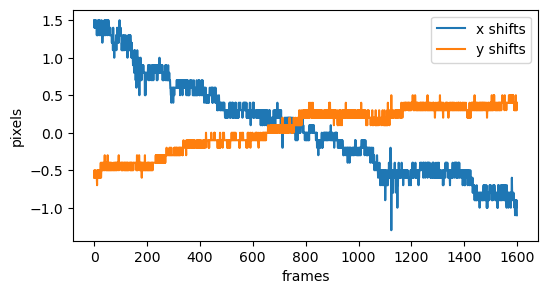

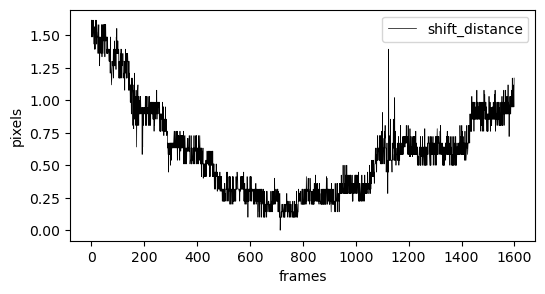

In [8]:
%matplotlib inline

# plot shifts
plt.plot(mot_correct.shifts_rig)
plt.legend(['x shifts', 'y shifts'])
plt.xlabel('frames')
plt.ylabel('pixels')
plt.gcf().set_size_inches(6,3)

plt.savefig(f"{output_path}/motion_shifts.png")
plt.show()
shift_distance = []
for rig in mot_correct.shifts_rig:
    shift_distance.append(np.sqrt(np.power(rig[0],2)+np.power(rig[1],2)))
plt.clf()

# plot distance of shifts
plt.plot(shift_distance, color = 'black', linewidth = 0.5) 
plt.legend(['shift_distance'])
plt.xlabel('frames')
plt.ylabel('pixels')
plt.gcf().set_size_inches(6,3)
plt.savefig(f"{output_path}/motion_distance.png")
plt.show()


## Load memory mapped file
Memory mapping is discussed in more detail in `demo_pipeline.ipynb`.

In [9]:
# load memory mappable file
Yr, dims, T = cm.load_memmap(fname_new)
images = Yr.T.reshape((T,) + dims, order='F')

In [10]:
from tifffile import imsave
from skimage import io

mot_corrected = np.array(images)
io.imsave(os.path.join(output_path, "motion_corrected_movie.tif"), mot_corrected)


## Inspect summary images and set parameters
### Correlation-pnr plot
For CNMFE, Caiman uses the correlation and peak-to-noise ratio (PNR) for initialization, which will both tend to be high in regions that contain neurons. Hence, we set a threshold for both quantitites to remove the low correlation/low pnr regions and seed initialization with regions most likely to contain neuronal activity. 

Using `nb_inspect_correlation_pnr()`, you can inspect the correlation and PNR images to find threshold values for these quantities: `min_corr` and `min_pnr`. You can adjust the range of values displayed in the two subplots below by choosing the Y-box select tool (third button from the left) and selecting the desired region in the histograms on the right hand side of each image. You can also use the pan button (first button on the left) to zoom/adjust the axis limits in the histogram to make it easier to see the limits.

In [11]:
%matplotlib inline
# inspect the summary images and set the parameters
correlation_image, peak_to_noise_ratio = cm.summary_images.correlation_pnr(images[::max(T//1000, 1)], # subsample if needed
                                                                            gSig=5, # used for filter
                                                                            swap_dim=False) # change swap dim if output looks weird, it is a problem with tiffile
nb_inspect_correlation_pnr(correlation_image, peak_to_noise_ratio, cmap='inferno') # jet, fire are also good cmaps


:Layout
   .AdjointLayout.Correlation :AdjointLayout
      :Image   [x,y]   (corr)
      :DynamicMap   []
         :Histogram   [corr]   (Count)
   .AdjointLayout.Pnr         :AdjointLayout
      :Image   [x,y]   (pnr)
      :DynamicMap   []
         :Histogram   [pnr]   (Count)

# Parameter setting for CNMF-E
Everything is now set up to run source extraction with CNMFE. We will construct a new parameter dictionary and use this to modify the *existing* `parameters` object, using the `change_params()` method.

There are *two* main differences between the CNMF and CNMFE source separation algorithms. The first is the background model (this is discussed in the sidebar below on the Ring Model). The second difference is in how the models are initialized. This is addressed below when we go over setting corr/pnr thresholds for initialization, which we did not have to do for our 2p data.

For now, note that we have set `gnb` to `0`: this is effectively the flag telling Caiman to use CNMFE instead of CNMF. 

In [12]:
# parameters for source extraction and deconvolution
p = 1               # order of the autoregressive system
K = None            # upper bound on number of components per patch, in general None for CNMFE
gSig = np.array([5, 5])  # expected half-width of neurons in pixels 
gSiz = 2*gSig + 1     # half-width of bounding box created around neurons during initialization
merge_thr = .7      # merging threshold, max correlation allowed
rf = 40             # half-size of the patches in pixels. e.g., if rf=40, patches are 80x80
stride_cnmf = 20    # amount of overlap between the patches in pixels 
tsub = 1            # downsampling factor in time for initialization, increase if you have memory problems1
ssub = 1            # downsampling factor in space for initialization, increase if you have memory problems
gnb = 0             # number of background components (rank) if positive, set to 0 for CNMFE
low_rank_background = None  # None leaves background of each patch intact (use True if gnb>0)
nb_patch = 0        # number of background components (rank) per patch (0 for CNMFE)
min_corr = .8       # min peak value from correlation image
min_pnr = 8        # min peak to noise ration from PNR image
ssub_B = 1          # additional downsampling factor in space for background (increase to 2 if slow)
ring_size_factor = 1.5  # radius of ring is gSiz*ring_size_factor

parameters.change_params(params_dict={'method_init': 'corr_pnr',  # use this for 1 photon
                                'K': K,
                                'gSig': gSig,
                                'gSiz': gSiz,
                                'merge_thr': merge_thr,
                                'p': p,
                                'tsub': tsub,
                                'ssub': ssub,
                                'rf': rf,
                                'stride': stride_cnmf,
                                'only_init': True,    # set it to True to run CNMF-E
                                'nb': gnb,
                                'nb_patch': nb_patch,
                                'method_deconvolution': 'oasis',       # could use 'cvxpy' alternatively
                                'low_rank_background': low_rank_background,
                                'update_background_components': True,  # sometimes setting to False improve the results
                                'min_corr': min_corr,
                                'min_pnr': min_pnr,
                                'normalize_init': False,               # just leave as is
                                'center_psf': True,                    # True for 1p
                                'ssub_B': ssub_B,
                                'ring_size_factor': ring_size_factor,
                                'del_duplicates': True,                # whether to remove duplicates from initialization
                                'border_pix': bord_px});                # number of pixels to not consider in the borders)

      446567 [params.py:       change_params():1156] [61] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


Initialize the model using the parameters.

In [13]:
cnmfe_model = cnmf.CNMF(n_processes=n_processes, 
                        dview=None, 
                        params=parameters)

<div class="alert alert-info">
    <h2 >CNMF-E: The Ring Model</h2>
   Background activity is very ill-behaved with 1p recordings: it often fluctuates locally and is much larger in magnitude than the neural signals we want to extract. In other words, the large-scale background model used for CNMF is not sufficient for most 1p data. Hence, Pengcheng Zhou and others came up with a localized model of background activity for CNMFE: the background at each pixel is represented as the weighted sum of activity from a circle (or ring) of pixels a certain distance from that pixel. The distance of this ring from the reference pixel is set by the <em>ring_size_factor</em> parameter. This more complex pixel-by-pixel background model explains why CNMFE is computationally more expensive than CNMF, and also why it works better to mop up large-scale localized background noise in  1p data. 
    
<p>When you set <em>gnb</em> in the CNMF model (usually to 1 or 2), you are setting the number of global background components. The fact that you can get away with so few is testament to how well-behaved the background activity is in 2p recordings. When we set <em>gnb</em> to 0 in Caiman, this is a flag telling Caiman's back end to switch to the more complicated ring model of the background activity.</p>

For more details on CNMFE you can see the <a href="https://elifesciences.org/articles/28728">original paper</a> and the <a href="https://elifesciences.org/articles/38173">Caiman paper</a>. 
</div>

## Key parameters for CNMFE
The key parameters for CNMFE are slightly different than for CNMF, but with some overlap. As we'll see, because of the high levels of background activity, we can't initialize the same way as with CNMF. We have two new important parameters directly related to initialization that come into play: `min_corr` and `min_pnr`. 

`rf` (int): *patch half-width*
> `rf`, which stands for 'receptive field', is the half width of patches in pixels. The patch width is `2*rf + 1`. `rf` should be *at least* 3-4 times larger than the observed neuron diameter. The larger the patch size, the less parallelization will be used by Caiman. If `rf` is set to `None`, then CNMFE will be run on the entire field of view.

`stride` (int): *patch overlap*
> `stride` is the overlap between patches in pixels (the actual overlap is `stride_cnmf + 1`). This should be at least the diameter of a neuron. The larger the overlap, the greater the computational load, but the results will be more accurate when stitching together results from different patches. This param should probably have been called 'overlap' instead of 'stride'.

`gSig (int, int)`: *half-width of neurons*
> `gSig` is roughly the half-width of neurons in your movie in pixels (height, width). It is the standard deviation of the mean-centered Gaussian used to filter the movie before initialization for CNMFE. It is related to the `gSiz` parameter, which is the width of the entire kernel filter.

`merge_thr (float)`: *merge threshold* 
> If the correlation between two spatially overlapping components is above `merge_thr`, they will be merged into one component. 

`min_corr` (float): *minimum correlation*
> Pixels from neurons tend to be correlated with their neighbors. During initialization, Caiman filters out those pixels below `min_corr` to help select seed pixels. We discuss this more below.

`min_pnr` (float): *minimum peak to noise ratio*
> Pixels from neurons tend to have a high signal-to-noise ratio. During initialization, Caiman filters out those pixels below `min_pnr` to help select seed pixels. We discuss this more below.

<div class="alert alert-info">
    <h2>CNMFE initialization: More on correlation and peak-to-noise-ratio</h2>
     <img src="images/mn_centered_gaussian.jpg" align="right" width="200"></img>
How are correlation and peak-to-noise ratio actually calculated? First Caiman convolves the motion corrected movie with a <i>mean-centered Gaussian</i> (example to the right). The sigma of the Gaussian is <em>gSig</em>, and mean centering is turned on by setting <em>center_psf</em> to <em>True</em>. This mean centering creates a Gaussian with a positive peak in the middle of width <i>approximately</i> <em>gSig/2</em>, surrounded by a negative trench, and a ledge of zeros around the outer edges. This crucial preprocessing filter serves to highlight neuronal peaks and smooth away low-frequency background activity.

<p>The function <em>correlation_pnr()</em> applies this mean-centered Gaussian to each frame of the motion corrected movie and returns the correlation image of that movie, as well as the peak-to-noise-ratio (PNR). The correlation image is the correlation of each pixel with its neighbors. The PNR is the ratio of the maximum magnitude at a pixel to the noise value at that pixel (it is a fast and rough measure of signal-to-noise). As mentioned above, both of these values tend to be higher in pixels that contain neurons. The CNMFE initialization procedure is to set a threshold for both quantities, take their <i>product</i>, and use the peaks in this product map to find <b>seed pixels</b> for initialization of the CNMFE source separation algorithm.</p>

More details on the initialization procedure used here can be found in the <a href="https://elifesciences.org/articles/28728">CNMFE paper</a>, or by exploring the code.         
</div>

## Run the CNMF-E algorithm

In [71]:
cnmfe_model.fit(images);

/Users/suliho/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/suliho/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/suliho/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/Users/suliho/miniconda3/envs/caiman/lib/python3.11/site-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 256 is greater than input length  = 239, using nperseg = 239
  freqs, _, Pxy = _spectral_helper(x, y, fs, win

Running the algorithm creates an `estimates` class, which we discuss in detail in `demo_pipeline.ipynb`. The CNMFE `estimates` class includes almost all the same attributes as with CNMF, such as the neural spatial and temporal components `A` and `C`. 

It also includes the discovered model of background activity, which is different from the CNMF model. For *CNMF* the background model is returned as low-rank matrices `b` and `f`. For CNMFE, the background model parameters are represented in the matrix `W` (the weights of the *ring model* -- discussed above -- for each pixel) as well as `b0` (a constant offset for each pixel). We will show how to reconstruct the background activity below. 

# Component Evaluation
Source extraction typically produces many false positives. Our next step is quality control: separating the results into "good" and "bad" neurons using two different metrics (discussed in detail in `demo_notebook.ipynb`):

- **Signal-to-noise ratio (SNR)**: a minimum SNR is set for the calcium transients (`min_SNR`).
- **Spatial correlation**:  a minimum correlation is set between the shape of each component and the frames in the movie when that component is active (`rval_thr`). 

> Caiman does *not* use the CNN classifier to sort neurons based on shape for 1p data: the network was trained on 2p data. Hence, we set the `use_cnn` param to `False`. 

Here we set the two parameters and run `evaluate_components()` to see which pass muster:

In [72]:
min_SNR = 5            # SNR threshold
rval_thr = 1    # spatial correlation threshold

quality_params = {'min_SNR': min_SNR,
                  'rval_thr': rval_thr,
                  'use_cnn': False}
cnmfe_model.params.change_params(params_dict=quality_params)

cnmfe_model.estimates.evaluate_components(images, cnmfe_model.params, dview=cluster)

print('*****')
print(f"Total number of components: {len(cnmfe_model.estimates.C)}")
print(f"Number accepted: {len(cnmfe_model.estimates.idx_components)}")
print(f"Number rejected: {len(cnmfe_model.estimates.idx_components_bad)}")

     1516303 [params.py:       change_params():1151] [33759] In setting CNMFParams, non-pathed parameters were used; this is deprecated. In some future version of Caiman, allow_legacy will default to False (and eventually will be removed)


*****
Total number of components: 25
Number accepted: 22
Number rejected: 3


# Visualize results

In [73]:
#%% plot contour plots of accepted and rejected components
cnmfe_model.estimates.plot_contours_nb(img=correlation_image, 
                                       idx=cnmfe_model.estimates.idx_components);

View traces of accepted and rejected components:

In [74]:
cnmfe_model.estimates.nb_view_components(img=correlation_image, 
                                        idx=cnmfe_model.estimates.idx_components,
                                        cmap='viridis', #gray
                                        thr=.9); #increase to see full footprint

for ith, index in enumerate(cnmfe_model.estimates.idx_components):
    print(f"neuron {ith+1} = ROI {index}")

neuron 1 = ROI 0
neuron 2 = ROI 1
neuron 3 = ROI 2
neuron 4 = ROI 3
neuron 5 = ROI 4
neuron 6 = ROI 5
neuron 7 = ROI 6
neuron 8 = ROI 7
neuron 9 = ROI 8
neuron 10 = ROI 9
neuron 11 = ROI 10
neuron 12 = ROI 12
neuron 13 = ROI 13
neuron 14 = ROI 14
neuron 15 = ROI 16
neuron 16 = ROI 17
neuron 17 = ROI 18
neuron 18 = ROI 20
neuron 19 = ROI 21
neuron 20 = ROI 22
neuron 21 = ROI 23
neuron 22 = ROI 24


# Save and load results

#### The results of Caiman are saved in an estimates object. This is stored inside the cnmf object, i.e. it can be accessed using cnmf.estimates. The variables of interest are:

`estimates.A`: Set of spatial components. Saved as a sparse column format matrix with dimensions (# of pixels X # of components). Each column corresponds to a spatial component.

`estimates.C`: Set of temporal components. Saved as a numpy array with dimensions (# of components X # of timesteps). Each row corresponds to a temporal component denoised and deconvolved.

`estimates.b`: Set of background spatial components (for 2p analysis): Saved as a numpy array with dimensions (# of pixels X # of components). Each column corresponds to a spatial background component.

`estimates.f`: Set of temporal background components (for 2p analysis). Saved as a numpy array with dimensions (# of background components X # of timesteps). Each row corresponds to a temporal background component.

`estimates.S`: Deconvolved neural activity (spikes) for each component. Saved as a numpy array with dimensions (# of background components X # of timesteps). Each row corresponds to the deconvolved neural activity for the corresponding component.

`estimates.YrA`: Set of residual components. Saved as a numpy array with dimensions (# of components X # of timesteps). Each row corresponds to the residual signal after denoising the corresponding component in estimates.C.

`estimates.F_dff`: Set of DF/F normalized temporal components. Saved as a numpy array with dimensions (# of components X # of timesteps). Each row corresponds to the DF/F fluorescence for the corresponding component.

`estimates.sn`: Standard deviation of the noise distribution. If no value is given, then sn is estimated from the data.

`estimates.bl`: Fluorescence baseline value. If no value is given, then bl is estimated from the data.

`estimates.b0`: The variables for one photon processing, for the baseline value for each pixel.

`dF_F`: calculated delta F over F. (caution: original CaIMaN strongly recommend NOT TO use dF/F for 1p image, because the background signal is ill-behaved.

In fact, `dF_F`, `estimates.C`, and `detrended calcium trace` all show the same graph. Only difference is *unit* of the y axis.

See below:

### Extract $\Delta F/F$ values
Currently in Caiman, we don't return a true dff value for 1p data. This is because, as mentioned in `demo_pipeline.ipynb`,  Caiman normalizes to both the baseline fluorescence and background activity. The background activity in 1p is so ill-behaved (as discussed above in the sidebar on the ring model) that Caiman currently only *detrends* the data by subtracting away the baseline but not normalizing the data. This explains the warning you will see when you run the following:


    cnmfe_model.estimates.detrend_df_f(quantileMin=8, 
                                      frames_window=250,
                                      flag_auto=False,
                                      use_residuals=False);  # use denoised data

In [75]:
from caiman.source_extraction.cnmf.utilities import extract_DF_F
C = cnmfe_model.estimates.C
YrA = cnmfe_model.estimates.YrA
f = cnmfe_model.estimates.f
A = cnmfe_model.estimates.A
b = cnmfe_model.estimates.b
bl = cnmfe_model.estimates.bl
b0 = cnmfe_model.estimates.b0
sn = cnmfe_model.estimates.sn
dims = cnmfe_model.estimates.dims
dF_F = extract_DF_F(Yr, A, C, bl)


Using thread. If memory issues set block_size larger than 500


In [76]:
z_score = []

for roi in C:
    std = np.std(roi)
    mean = np.mean(roi)
    item = [(i - mean)/std for i in roi]
    z_score.append(item)

# Visualize accepted / rejected ROI coordinates 

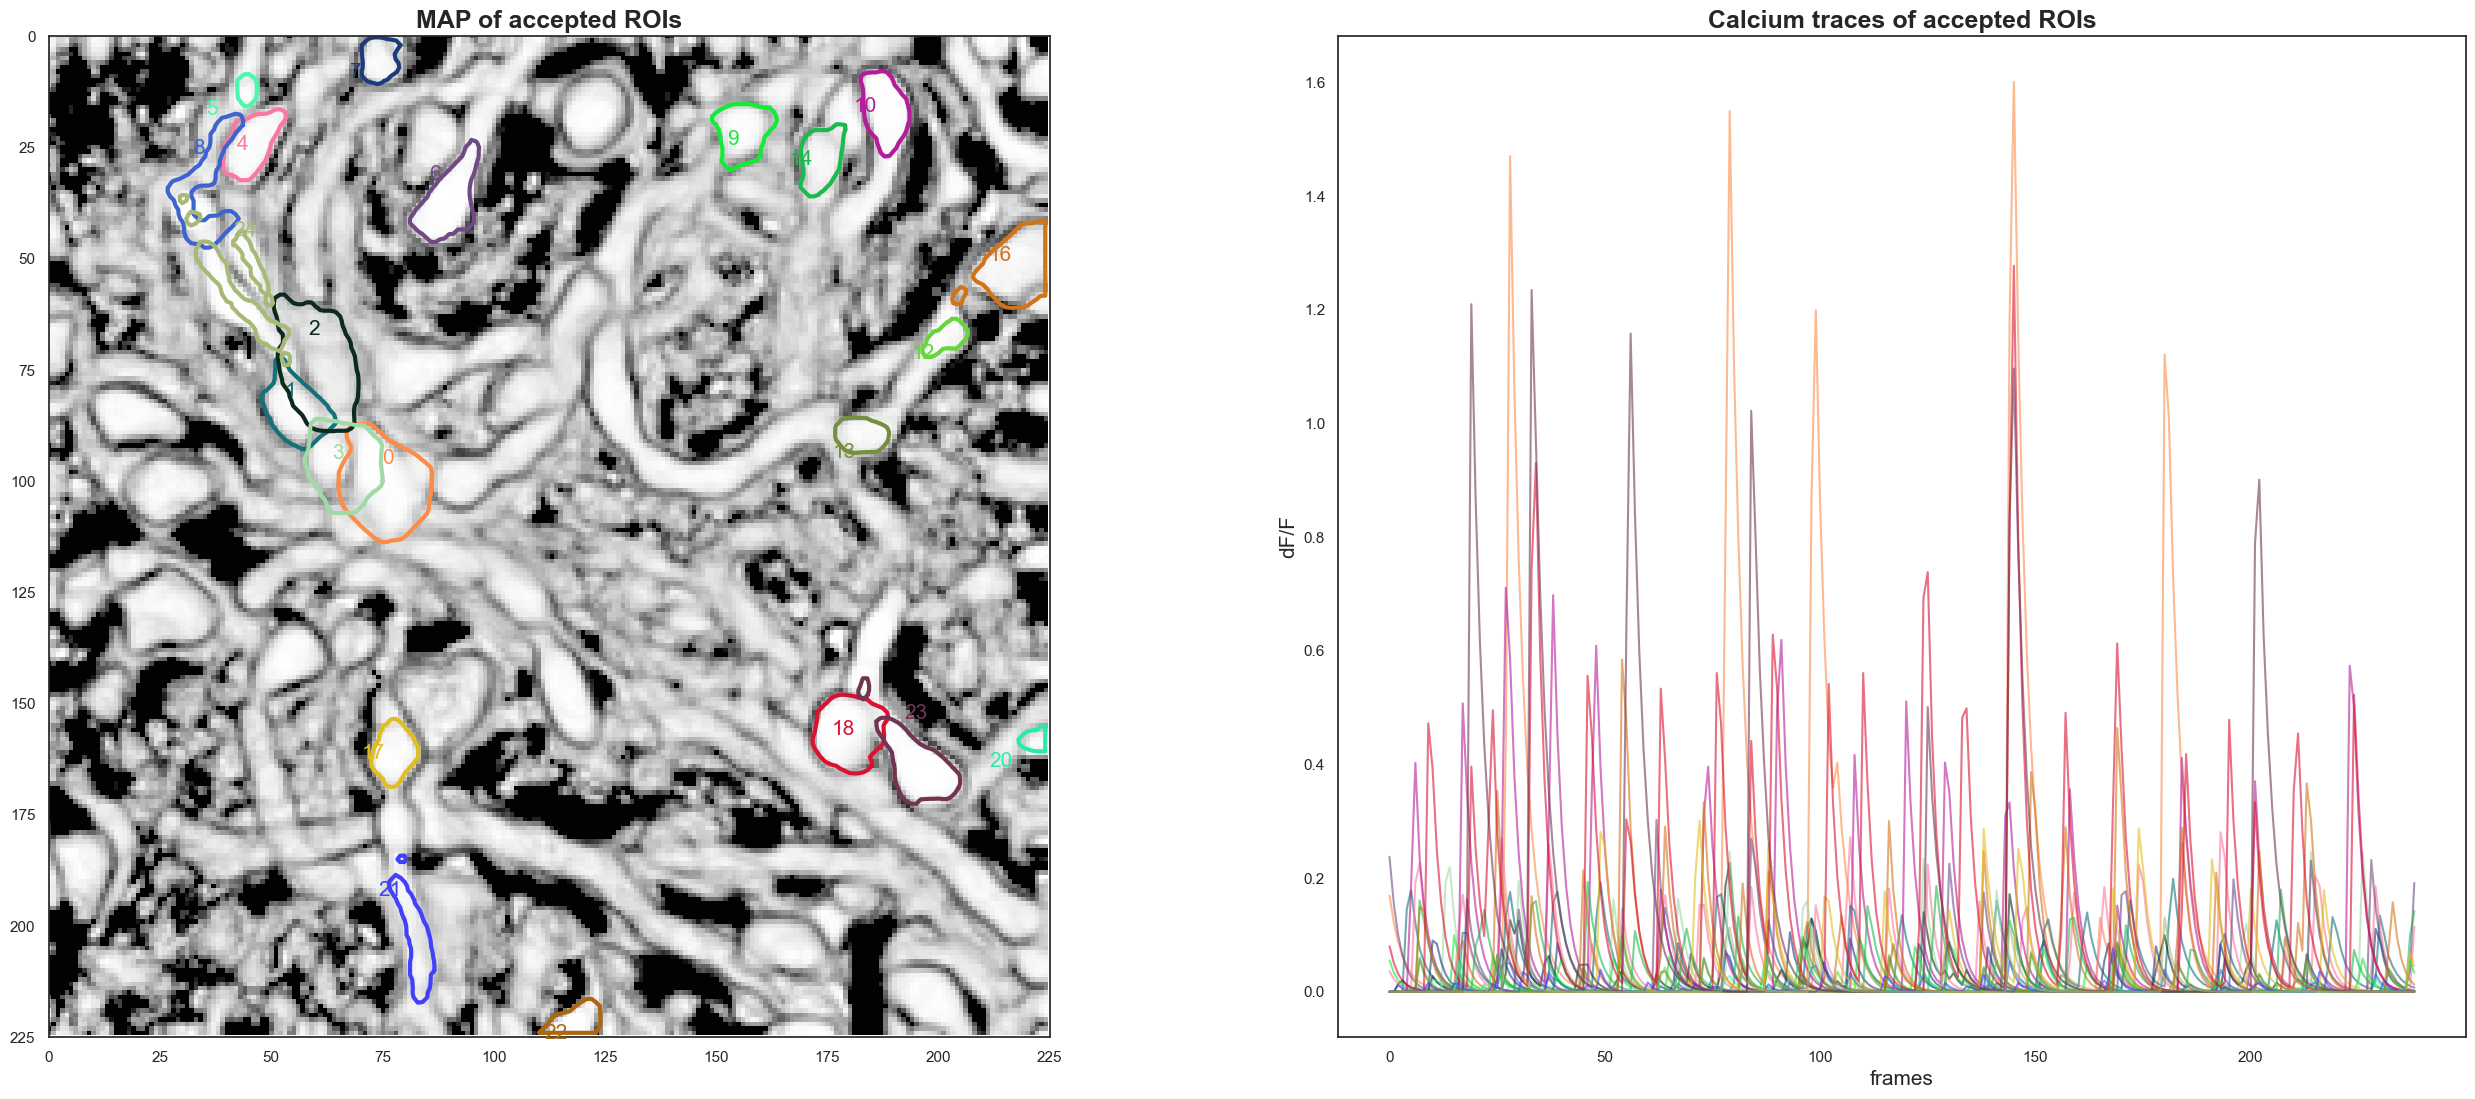

In [77]:
%matplotlib inline
import csv
import os

index_list = cnmfe_model.estimates.idx_components
index_list_bad = cnmfe_model.estimates.idx_components_bad
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from skimage import io
n, y, x = images.shape

########## mapping of accepted neurons ############

fig, axes = plt.subplots(1,2, figsize = (32,13))
axes[0].imshow(correlation_image, cmap='gray')
size = 0
for i in index_list:
    rcolor = np.random.rand(3,)
    axes[0].plot(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,0],cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,1],
                linewidth=3, color=rcolor)
    height = min(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,1])
    axes[0].text(max(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,0])-10, height+10, i, ha='center', va='bottom', 
                size=15,color=rcolor)
    axes[1].plot(dF_F[i], alpha=0.6, color=rcolor)
    size += 1
#axes[0].legend(index_list, fontsize=10, bbox_to_anchor=(1.05, 1.0), loc='upper left')
axes[0].set_xlim([0,x])
axes[0].set_ylim([y,0])
axes[0].set_title("MAP of accepted ROIs", size=18, fontweight='heavy')
# axes[0].get_legend().remove()
# axes[1].legend(index_list, fontsize=10, bbox_to_anchor=(1.05, 1.0), loc='upper left')
axes[1].set_title("Calcium traces of accepted ROIs", size=18, fontweight='heavy')
axes[1].set_xlabel("frames",size=15)
axes[1].set_ylabel("dF/F",size=15)

plt.savefig(os.path.join(output_path, "accepted ROIs and Traces.png"))



# ########## mapping of rejected neurons ############
# fig, axes = plt.subplots(1,2, figsize = (32,13))
# axes[0].imshow(correlation_image, cmap='gray')
# size = 0
# for i in index_list_bad:
#     rcolor = np.random.rand(3,)
#     axes[0].plot(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,0],cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,1],
#                 linewidth=3, color=rcolor)
#     height = min(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,1])
#     axes[0].text(max(cnmfe_model.estimates.coordinates[i]['coordinates'][1:-1,0])-10, height+10, i, ha='center', va='bottom', 
#                 size=15,color=rcolor)
#     axes[1].plot(dF_F[i], alpha=0.6, color=rcolor)
#     size += 1
# axes[0].legend(index_list, fontsize=10, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# axes[0].set_xlim([0,x])
# axes[0].set_ylim([y,0])
# axes[0].set_title("MAP of accepted ROIs", size=18, fontweight='heavy')
# # axes[0].get_legend().remove()
# axes[1].legend(index_list, fontsize=10, bbox_to_anchor=(1.05, 1.0), loc='upper left')
# axes[1].set_title("Calcium traces of accepted_ROIs", size=18, fontweight='heavy')
# axes[1].set_xlabel("frames",size=15)
# axes[1].set_ylabel("dF/F",size=15)

# plt.savefig(os.path.join(output_path, "rejected ROIs and Traces.png"))

# Save results as csv files

1. `rois.csv`: accepted/rejected ROI flag (accepted = 1 means accepted, accepted=0 means rejected)

2. `coordinates.csv`: coordinates and center of mass of each ROIs

3. `df_f_accepted.csv`: df_f for accepted ROIs

4. `df_f_rejected.csv`: df_f for rejected ROIs

5. `z_score_accepted.csv`: z-score for accepted ROIs

6. `z_score_rejected.csv`: z-score for rejected ROIs

7. `shifts.csv`: shifted pixel according to timesteps


In [78]:
import pandas as pd

## save idx of rois and accepted flag (accepted = 1 means accepted, accepted=0 means rejected)
filename = os.path.join(output_path, 'rois.csv')
num_accepted = 0
num_rejected = 0
with open (filename, 'w', newline="") as f: 
    writer = csv.writer(f)
    writer.writerow(['RoIIdx', 'accepted'])
    for index in range(len(cnmfe_model.estimates.C)):
        if index in cnmfe_model.estimates.idx_components:
            accepted = 1; num_accepted +=1
        else:
            accepted = 0; num_rejected += 1
        writer.writerow([index, accepted])
    writer.writerow(['num_accepted', num_accepted])
    writer.writerow(['num_rejected', num_rejected])
    f.close()

## save coordinates and CoM
filename = os.path.join(output_path, 'coordinates.csv')
with open (filename, 'w', newline="") as f: 
    writer = csv.writer(f)
    writer.writerow(['RoIIdx', 'accepted', 'x', 'y', 'is_CoM'])
    for index, item in enumerate(cnmfe_model.estimates.coordinates):
        if index in cnmfe_model.estimates.idx_components:
            accepted = 1
        else:
            accepted = 0
        com = cnmfe_model.estimates.coordinates[index]['CoM']
        coordinate = cnmfe_model.estimates.coordinates[index]['coordinates']
        for ith, i in enumerate(coordinate):
            if (ith != 0 and ith != len(coordinate)-1):
                writer.writerow([index, accepted, i[0], i[1], '0'])
        writer.writerow([index, accepted, com[1], com[0], '1'])
    f.close()

## save accepted df/f and rejected df/f
all_df_f_pd =pd.DataFrame(dF_F)
accepted_df_f = []
rejected_df_f = []
for idx in cnmfe_model.estimates.idx_components:
    accepted_df_f.append(dF_F[idx])
for idx in cnmfe_model.estimates.idx_components_bad:
    rejected_df_f.append(dF_F[idx])
accepted_df_f_pd = pd.DataFrame(accepted_df_f)
rejected_df_f_pd = pd.DataFrame(rejected_df_f)

accepted_df_f_pd = accepted_df_f_pd.transpose()
rejected_df_f_pd = rejected_df_f_pd.transpose()

n = 0
for idx in sorted(index_list):
    accepted_df_f_pd.rename(columns={accepted_df_f_pd.columns[n]: f"ROI {idx}"}, inplace = True)
    n += 1
accepted_df_f_pd.insert(0,"time(sec)", " ")
for t in range(0, len(dF_F)):
    accepted_df_f_pd.iloc[t,0]=t/frate

accepted_df_f_pd.to_csv(os.path.join(output_path,'df_f_accepted.csv'))


n = 0
for idx in sorted(index_list_bad):
    rejected_df_f_pd.rename(columns={rejected_df_f_pd.columns[n]: f"ROI {idx}"}, inplace = True)
    n += 1
rejected_df_f_pd.insert(0,"time(sec)", " ")
for t in range(0, len(dF_F)):
    rejected_df_f_pd.iloc[t,0]=t/frate
rejected_df_f_pd.to_csv(os.path.join(output_path,'df_f_rejected.csv'))



## save accepted zscore and rejected zscore
all_z_score =pd.DataFrame(z_score)
accepted_z_score = []
rejected_z_score = []
for idx in cnmfe_model.estimates.idx_components:
    accepted_z_score.append(z_score[idx])
for idx in cnmfe_model.estimates.idx_components_bad:
    rejected_z_score.append(z_score[idx])
accepted_z_score_pd = pd.DataFrame(accepted_z_score)
rejected_z_score_pd = pd.DataFrame(rejected_z_score)

accepted_z_score_pd = accepted_z_score_pd.transpose()
rejected_z_score_pd = rejected_z_score_pd.transpose()

n = 0
for idx in sorted(index_list):
    accepted_z_score_pd.rename(columns={accepted_z_score_pd.columns[n]: f"ROI {idx}"}, inplace = True)
    n += 1
accepted_z_score_pd.insert(0,"time(sec)", " ")
for t in range(0, len(dF_F)):
    accepted_z_score_pd.iloc[t,0]=t/frate

accepted_z_score_pd.to_csv(os.path.join(output_path,'z_score_accepted.csv'))


n = 0
for idx in sorted(index_list_bad):
    rejected_z_score_pd.rename(columns={rejected_z_score_pd.columns[n]: f"ROI {idx}"}, inplace = True)
    n += 1
rejected_z_score_pd.insert(0,"time(sec)", " ")
for t in range(0, len(dF_F)):
    rejected_z_score_pd.iloc[t,0]=t/frate
rejected_z_score_pd.to_csv(os.path.join(output_path,'z_score_rejected.csv'))


shift_distance_pd = pd.DataFrame(shift_distance)
shift_distance_pd.insert(0,"time(sec)", " ")
for t in range(0, len(dF_F)):
    shift_distance_pd.iloc[t,0]=t/frate
shift_distance_pd.columns = ['time(sec)', 'shifts(pixel)']
shift_distance_pd.to_csv(os.path.join(output_path,'shift_distance.csv'))

# Plot and save extracted dF/F traces

if you want to see calcium traces in ipynb environment,

`see_trace` == `True`

if you want to see calcium traces in local,

`see_trace` = `False`

In [79]:
## see extracted calcium trace
import seaborn as sns
%matplotlib inline

# font size rescaling
trace_save_path = os.path.join(output_path, './traces') 
if not os.path.exists(trace_save_path):
    os.mkdir(trace_save_path)

trace_zscore_save_path = os.path.join(output_path, './traces_zsocre') 
if not os.path.exists(trace_zscore_save_path):
    os.mkdir(trace_zscore_save_path)

sns.set_context("notebook", font_scale=1)

# plot df/f traces
see_trace = False
t = np.arange(0, dF_F.shape[-1]/frate, 1/frate)
for idx, data in enumerate(dF_F):
    if idx in cnmfe_model.estimates.idx_components:
        plt.figure(figsize=(10,5))
        plt.title(f'roi idx: {idx}')
        plt.plot(t, dF_F[idx], color = 'black', linewidth = 1, alpha = 0.6)
        plt.savefig(os.path.join(trace_save_path, f'roi{idx}.png'))
        if see_trace:
            plt.show()
        else:
            plt.close()

# plot z score traces
see_trace = False
t = np.arange(0, dF_F.shape[-1]/frate, 1/frate)
for idx, data in enumerate(dF_F):
    if idx in cnmfe_model.estimates.idx_components:
        plt.figure(figsize=(10,5))
        plt.title(f'roi idx: {idx}')
        plt.plot(t, z_score[idx], color = 'black', linewidth = 1, alpha = 0.6)
        plt.savefig(os.path.join(trace_zscore_save_path, f'roi{idx}.png'))
        if see_trace:
            plt.show()
        else:
            plt.close()

# Plot clustering heatmap of df_f values

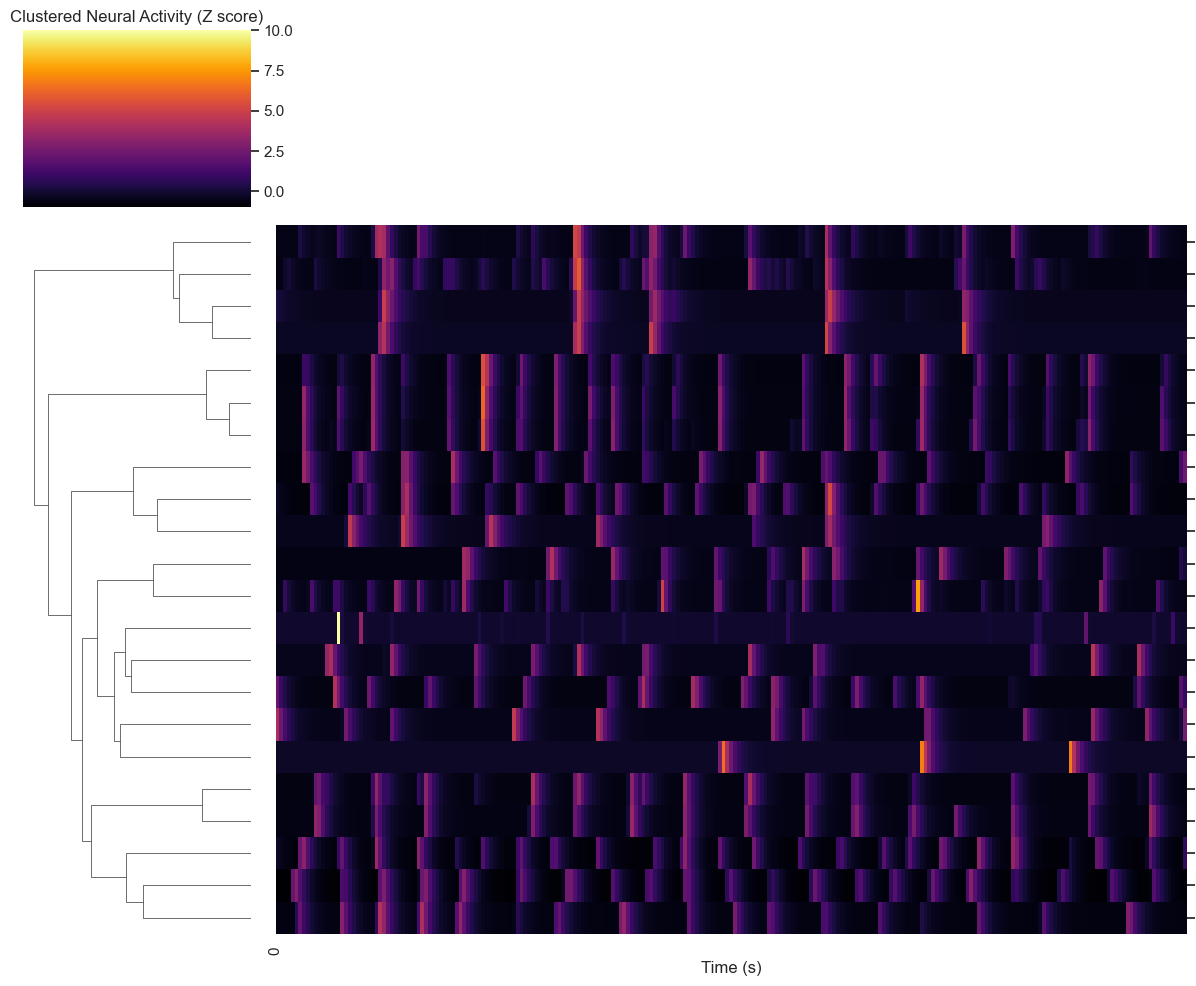

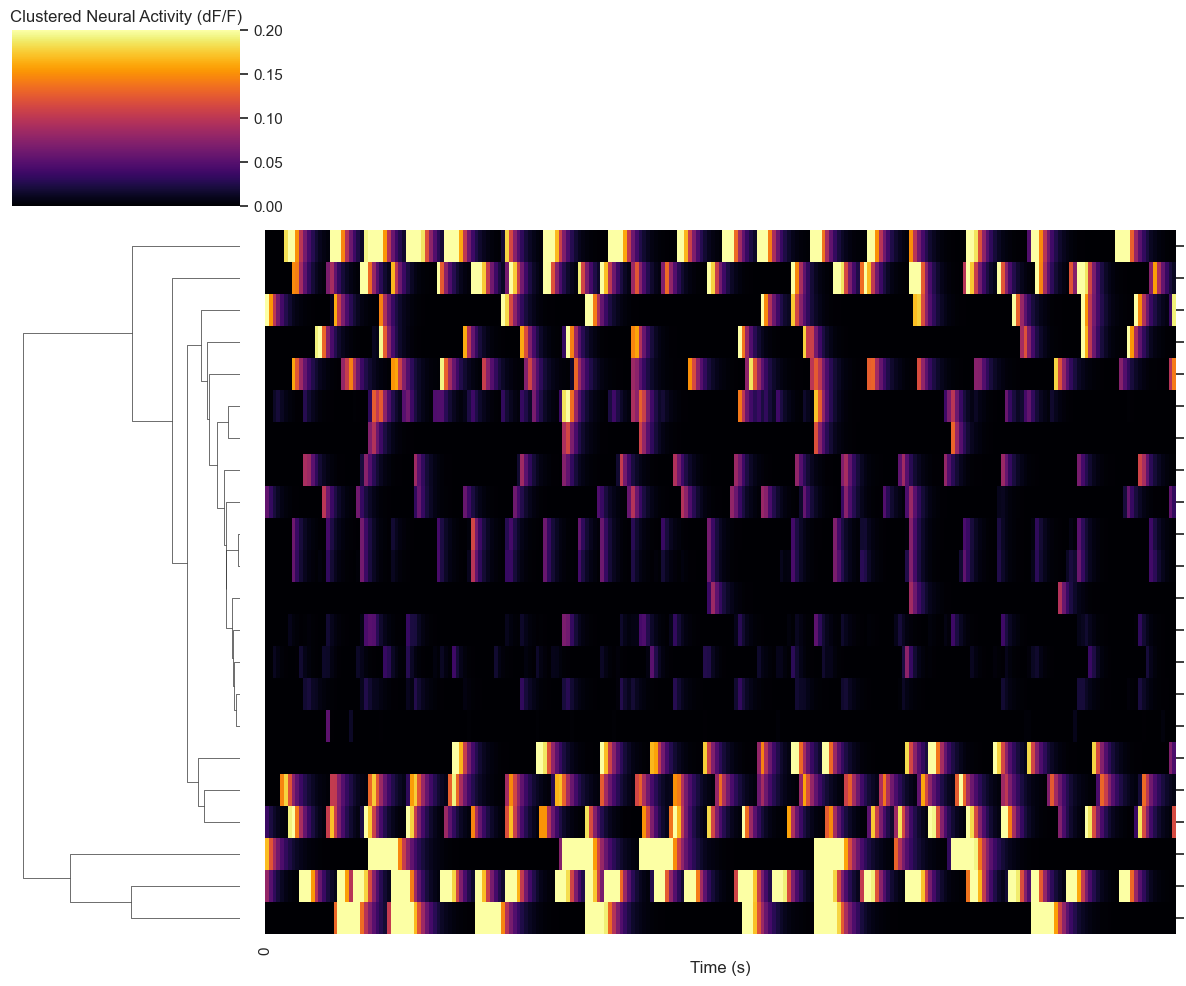

In [80]:
%matplotlib inline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

data_for_clustering = accepted_df_f_pd.drop(columns=["time(sec)"]).T
zscore_for_clustering = accepted_z_score_pd.drop(columns=["time(sec)"]).T

# font size rescaling
sns.set_context("notebook", font_scale=0.4)
sns.set(style="white")


cg1 = sns.clustermap(
    zscore_for_clustering,
    method="ward",        # hierarchical clustering method
    metric="euclidean",   # distance metric
    cmap="inferno",
    figsize=(12, 10),
    col_cluster=False, vmax=10    # 시간 축은 clustering하지 않음,
)

cg1.ax_heatmap.set_yticklabels([])
cg1.ax_heatmap.set_ylabel("")
cg1.ax_heatmap.tick_params(left=False, bottom=False)

time_values = zscore_for_clustering.columns
tick_step = 500
tick_indices = [i for i, t in enumerate(time_values) if t % tick_step == 0]

cg1.ax_heatmap.set_xticks(tick_indices)
cg1.ax_heatmap.set_xticklabels([f"{int(time_values[i])}" for i in tick_indices], rotation=90)
cg1.ax_heatmap.set_xlabel("Time (s)")


plt.title("Clustered Neural Activity (Z score)")
plt.tight_layout()
plt.show()


cg2 = sns.clustermap(
    data_for_clustering,
    method="ward",        # hierarchical clustering method
    metric="euclidean",   # distance metric
    cmap="inferno",
    figsize=(12, 10),
    col_cluster=False,     # 시간 축은 clustering하지 않음,
    vmax = 0.2
)
cg2.ax_heatmap.set_yticklabels([])
cg2.ax_heatmap.set_ylabel("")
cg2.ax_heatmap.tick_params(left=False, bottom=False)
time_values = data_for_clustering.columns
tick_step = 500
tick_indices = [i for i, t in enumerate(time_values) if t % tick_step == 0]

cg2.ax_heatmap.set_xticks(tick_indices)
cg2.ax_heatmap.set_xticklabels([f"{int(time_values[i])}" for i in tick_indices], rotation=90)
cg2.ax_heatmap.set_xlabel("Time (s)")

plt.title("Clustered Neural Activity (dF/F)")
plt.tight_layout()
plt.show()

# Clean up open resourses
Shut down server, close logger.

In [81]:
cm.stop_server(dview=cluster)

In [82]:
# Shut down logger (otherwise will not be able to delete it)
logging.shutdown()

In [83]:
delete_logs = True
logging_dir = cm.paths.get_tempdir() 
if delete_logs:
    log_files = glob.glob(logging_dir + '\\demo_pipeline' + '*' + '.log')
    for log_file in log_files:
        print(f"Deleting {log_file}")
        os.remove(log_file)
else:
    print(f"If you want to inspect your logs they are in {logging_dir}")